# Import Libraries

In [1]:
import numpy as np
import pandas as pd

# Loading the Data and Selecting the Features

## Load Data

In [2]:
loan_data_inputs_train = pd.read_csv('C:\\Users\\scarl\\Desktop\\projects\\Credit Risk Modeling (Python)\\loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('C:\\Users\\scarl\\Desktop\\projects\\Credit Risk Modeling (Python)\\loan_data_targets_train.csv', index_col = 0)
loan_data_inputs_test = pd.read_csv('C:\\Users\\scarl\\Desktop\\projects\\Credit Risk Modeling (Python)\\loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('C:\\Users\\scarl\\Desktop\\projects\\Credit Risk Modeling (Python)\\loan_data_targets_test.csv', index_col = 0)

## Explore Data

In [3]:
loan_data_inputs_train.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,...,1,0,0,1,0,0,0,0,0,0
206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,...,0,0,0,1,0,0,0,0,0,0
136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,...,0,0,0,1,0,0,0,0,0,0
412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,...,0,0,0,1,0,0,0,0,0,0
36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,...,0,1,0,1,0,0,0,0,0,0


In [4]:
loan_data_targets_train.head()

,good_bad
427211,1
206088,1
136020,1
412305,1
36159,0


In [5]:
loan_data_inputs_train.shape

(373028, 324)

In [6]:
loan_data_targets_train.shape

(373028, 1)

In [7]:
loan_data_inputs_test.shape

(93257, 324)

In [8]:
loan_data_targets_test.shape

(93257, 1)

## Selecting the Features

In [9]:
#select a limited set of input variables in a new dataframe, which is our dummy variable columns.
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [10]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [11]:
# drop the variables with variable names in the list with reference categories. Or, it will cause dummy variable trap
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,True,False,False,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
206088,False,False,True,False,False,False,False,True,0,False,...,0,1,0,0,1,0,0,0,0,0
136020,True,False,False,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0
412305,False,False,False,True,False,False,False,False,0,False,...,0,1,0,0,1,0,0,0,0,0
36159,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0


In [12]:
# correlation_matrix = inputs_train.corr()
# print(correlation_matrix)

In [13]:
# find constant columns to prevent the error that matrix is not invertible to conduct fit function
constant_columns = [col for col in inputs_train.columns if inputs_train[col].nunique() == 1]
print(constant_columns)

[]


In [14]:
inputs_train.drop(columns=constant_columns, inplace=True)

# PD Model Estimation

## Fitting a Logistic Model

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [16]:
reg =  LogisticRegression()

In [17]:
pd.options.display.max_rows = None

In [18]:
reg.fit(inputs_train,loan_data_targets_train)

C:\Users\scarl\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [19]:
reg.intercept_

array([-0.3700961])

In [20]:
reg.coef_

array([[ 0.92519979,  0.75792741,  0.5753836 ,  0.38392986,  0.22244486,
         0.03094506,  0.07917638,  0.0906846 ,  0.05188557,  0.09526271,
         0.07841631,  0.06002924,  0.08971689,  0.14733772,  0.12817075,
         0.18207858,  0.25606321,  0.26124924,  0.26854365,  0.34700652,
         0.51614379,  0.06793326, -0.01349685,  0.31445282,  0.19560167,
         0.17867007,  0.2564773 ,  0.0665669 ,  0.07268398,  0.11812199,
         0.13410738,  0.10394729,  0.07343544,  0.13500448,  1.54251274,
         1.20805268,  1.09344665,  0.81598537,  0.56439164,  0.25595232,
        -0.0208802 ,  0.9855793 ,  0.60227813,  0.34900934,  0.13787305,
         0.0552432 ,  0.05088973,  0.10650113,  0.14114978,  0.12876556,
        -0.12292166, -0.12945618,  0.32266918,  0.17183397, -0.05630608,
         0.04862289, -0.05334802, -0.06631088, -0.08064443, -0.05967418,
        -0.02647185, -0.07309768,  0.18954719,  0.0247968 , -0.03711285,
         0.03017106,  0.14041813,  0.05602675,  0.0

In [21]:
# Stores the names of the columns of a dataframe in a variable.
feature_name = inputs_train.columns.values

In [22]:
summary_table = pd.DataFrame(columns = ['feature name'], data = feature_name)
# we turn the rows of coeffcient to a column by 'transpose'
summary_table['Coefficient'] = np.transpose(reg.coef_)

In [23]:
# move all table data one row down
summary_table.index = summary_table.index + 1
# Assigns values of the row with index 0 of the dataframe.
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
# Sorts the dataframe by index.
summary_table = summary_table.sort_index()
summary_table

,feature name,Coefficient
0,Intercept,-0.370096
1,grade:A,0.925200
2,grade:B,0.757927
3,grade:C,0.575384
4,grade:D,0.383930
5,grade:E,0.222445
6,grade:F,0.030945
7,home_ownership:OWN,0.079176
8,home_ownership:MORTGAGE,0.090685
9,addr_state:NM_VA,0.051886


## Build a Logistic Regression Model with P-values

In [24]:
from sklearn import linear_model
import scipy.stats as stat

#### Calculating p values for each coefficient is univariate, meaning they take into account the impact of each feature to outcome as if there is no other features. However, the impact of all features on outcome is collective rather than independent. Therefore, calculating p-value is not good. The good method is to alter the .fit() from the LogisticRegression class.

In [25]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [26]:
reg = LogisticRegression_with_p_values()

In [27]:
inputs_train.dtypes

grade:A                                 bool
grade:B                                 bool
grade:C                                 bool
grade:D                                 bool
grade:E                                 bool
grade:F                                 bool
home_ownership:OWN                      bool
home_ownership:MORTGAGE                 bool
addr_state:NM_VA                       int64
addr_state:NY                           bool
addr_state:OK_TN_MO_LA_MD_NC           int64
addr_state:CA                           bool
addr_state:UT_KY_AZ_NJ                 int64
addr_state:AR_MI_PA_OH_MN              int64
addr_state:RI_MA_DE_SD_IN              int64
addr_state:GA_WA_OR                    int64
addr_state:WI_MT                       int64
addr_state:TX                           bool
addr_state:IL_CT                       int64
addr_state:KS_SC_CO_VT_AK_MS           int64
addr_state:WV_NH_WY_DC_ME_ID           int64
verification_status:Not Verified        bool
verificati

In [28]:
inputs_train = inputs_train.astype(int)

In [29]:
reg.fit(inputs_train, loan_data_targets_train)

C:\Users\scarl\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.370096
1,grade:A,0.925200
2,grade:B,0.757927
3,grade:C,0.575384
4,grade:D,0.383930
5,grade:E,0.222445
6,grade:F,0.030945
7,home_ownership:OWN,0.079176
8,home_ownership:MORTGAGE,0.090685
9,addr_state:NM_VA,0.051886


In [31]:
p_values = reg.p_values

In [32]:
# np.nan is a placeholder
p_values = np.append(np.nan, np.array(p_values))

In [33]:
summary_table['p_values'] = p_values

In [34]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.370096,NaN
1,grade:A,0.925200,3.079797e-19
2,grade:B,0.757927,1.624626e-30
3,grade:C,0.575384,5.525461e-21
4,grade:D,0.383930,4.559782e-11
5,grade:E,0.222445,1.950987e-05
6,grade:F,0.030945,5.681802e-01
7,home_ownership:OWN,0.079176,2.890888e-04
8,home_ownership:MORTGAGE,0.090685,3.715336e-11
9,addr_state:NM_VA,0.051886,1.324274e-01


In [35]:
summary_table.to_excel('C:\\Users\\scarl\\Desktop\\projects\\Credit Risk Modeling (Python)\\summary_table.xlsx', index = True)

#### Even though some p-value is greater than 0.05, other dummy variables in the same category is statistically significant. Therefore, we keep that variable

In [36]:
# take only the dummy variables we found significant, including the reference dummy variable
inputs_train_with_ref_cat = loan_data_inputs_train.loc[:,['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57'
]]

In [37]:
# keep the reference categories of the dummy variables we found significant
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'annual_inc:<20K',
'mths_since_last_delinq:0-3']

In [38]:
# statistically significant dummy variables
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57
427211,True,False,False,False,False,False,False,True,0,False,...,1,0,0,0,0,0,1,0,0,0
206088,False,False,True,False,False,False,False,True,0,False,...,0,0,0,1,0,0,0,1,0,0
136020,True,False,False,False,False,False,False,True,0,False,...,0,1,0,0,0,0,0,0,1,0
412305,False,False,False,True,False,False,False,False,0,False,...,0,0,0,0,0,0,0,1,0,0
36159,False,False,True,False,False,False,False,True,0,False,...,0,0,1,0,0,0,1,0,0,0


In [39]:
inputs_train = inputs_train.astype(int)
print(inputs_train.dtypes)

grade:A                                int32
grade:B                                int32
grade:C                                int32
grade:D                                int32
grade:E                                int32
grade:F                                int32
home_ownership:OWN                     int32
home_ownership:MORTGAGE                int32
addr_state:NM_VA                       int32
addr_state:NY                          int32
addr_state:OK_TN_MO_LA_MD_NC           int32
addr_state:CA                          int32
addr_state:UT_KY_AZ_NJ                 int32
addr_state:AR_MI_PA_OH_MN              int32
addr_state:RI_MA_DE_SD_IN              int32
addr_state:GA_WA_OR                    int32
addr_state:WI_MT                       int32
addr_state:TX                          int32
addr_state:IL_CT                       int32
addr_state:KS_SC_CO_VT_AK_MS           int32
addr_state:WV_NH_WY_DC_ME_ID           int32
verification_status:Not Verified       int32
verificati

In [40]:
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

C:\Users\scarl\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
feature_name = inputs_train.columns.values

In [42]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.242444
1,grade:A,0.907848
2,grade:B,0.734869
3,grade:C,0.539736
4,grade:D,0.342794
5,grade:E,0.170730
6,grade:F,-0.039177
7,home_ownership:OWN,0.070423
8,home_ownership:MORTGAGE,0.081599
9,addr_state:NM_VA,0.049573


In [43]:
# add the 'p_values' just as before.
p_values = reg2.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.242444,NaN
1,grade:A,0.907848,1.051444e-18
2,grade:B,0.734869,5.140006e-29
3,grade:C,0.539736,7.677199e-19
4,grade:D,0.342794,3.085834e-09
5,grade:E,0.170730,8.397687e-04
6,grade:F,-0.039177,4.590897e-01
7,home_ownership:OWN,0.070423,1.227071e-03
8,home_ownership:MORTGAGE,0.081599,2.081936e-09
9,addr_state:NM_VA,0.049573,1.496341e-01


In [44]:
summary_table.to_excel('C:\\Users\\scarl\\Desktop\\projects\\Credit Risk Modeling (Python)\\final_summary_table.xlsx', index = True)

#### Interpretation of the coefficients in the PD model:
#### eg. odds(Y=1|grade=D)/odds(Y=1|grade=G) = e^beta_D, where grade=G is the reference category, Y=1 means that borrower will not default.

# PD Model Validation (Test)

## Out-of-sample validation

In [45]:
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57'
]]

In [46]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'annual_inc:<20K',
'mths_since_last_delinq:0-3']

In [47]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57
362514,False,False,True,False,False,False,False,True,0,False,...,0,0,0,0,0,0,1,0,0,0
288564,False,False,False,False,True,False,False,True,0,False,...,0,0,0,0,0,0,0,0,0,0
213591,False,False,True,False,False,False,False,True,0,False,...,0,0,0,0,0,1,0,0,1,0
263083,False,False,True,False,False,False,False,True,0,False,...,0,0,0,0,0,0,1,0,0,0
165001,True,False,False,False,False,False,False,True,0,False,...,0,1,0,0,0,0,0,0,1,0


In [48]:
y_hat_test = reg2.model.predict(inputs_test)
y_hat_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

#### 'predict' method returns predicted class(0/1,good/bad) and the 'predict_proba' method returns all probabilities to belong to each of the class

In [49]:
# obtain the raw probability perdiction
y_hat_test_proba = reg2.model.predict_proba(inputs_test)

In [50]:
y_hat_test_proba

array([[0.06652587, 0.93347413],
       [0.07388257, 0.92611743],
       [0.10300488, 0.89699512],
       ...,
       [0.01922255, 0.98077745],
       [0.03928177, 0.96071823],
       [0.0441328 , 0.9558672 ]])

In [51]:
y_hat_test_proba[:][:,1]

array([0.93347413, 0.92611743, 0.89699512, ..., 0.98077745, 0.96071823,
       0.9558672 ])

In [52]:
y_hat_test_proba = y_hat_test_proba[:][:,1]

In [53]:
loan_data_targets_test_temp = loan_data_targets_test

In [54]:
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)

In [55]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp,pd.DataFrame(y_hat_test_proba)],axis = 1)

In [56]:
df_actual_predicted_probs.shape

(93257, 2)

In [57]:
df_actual_predicted_probs.columns = ['loan_data_targets_test','y_hat_test_proba']

In [58]:
df_actual_predicted_probs.index = loan_data_inputs_test.index

In [59]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
362514,1,0.933474
288564,1,0.926117
213591,1,0.896995
263083,1,0.961842
165001,1,0.965326


## Accurary and Area under the Curve

In [60]:
tr = 0.7
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba']>tr,1,0)

In [61]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test'],
            rownames = ['Actual'],colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,427,8190
1,765,83875


In [62]:
# getting percentages
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], 
            rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.004579,0.087822
1,0.008203,0.899396


In [63]:
# Calculate Accuracy of the model, which is the sum of the diagonal rates.
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], 
             rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0]

+ (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], 
               rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.899396291967359

When tr = 0.5, everyone is predicted to be a good borrower. When tr = 0.75, lots of people who defualt are predcited to be good borrowers by model, thus indicating high false positive rates but with high accuracy. When tr = 0.9, the false positive rate decreases and with , but false negative increases a lot, meaning that many people who do not default are predicted to default. The criteria is too strict, and bank are having less business. However, giving loans (have business) and accuracy are both important. Thereofore, overal accuracy is not the universal measure of PD model. 

In [64]:
from sklearn.metrics import roc_curve, roc_auc_score

In [65]:
# ‘roc_curve' returns the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.
# As a result, we get three arrays: the false positive rates, the true positive rates, and the thresholds.
roc_curve(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99941975, 0.99941975,
        1.        ]),
 array([0.00000000e+00, 1.18147448e-05, 1.18147448e-04, ...,
        9.99988185e-01, 1.00000000e+00, 1.00000000e+00]),
 array([       inf, 0.9947677 , 0.99415543, ..., 0.53264275, 0.53227302,
        0.50186801]))

In [66]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test_proba'])

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

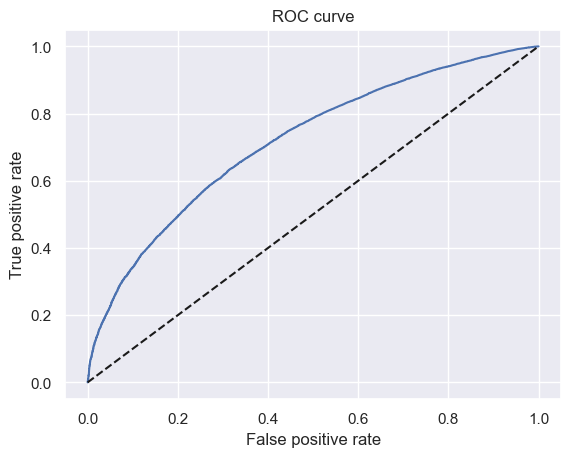

In [68]:
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], linestyle='--', color='k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [69]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.
AUROC

0.7173211295351234

## Gini and Kolmogorov-Smirnovm

#### Gini coefficient: measure the inequality between nondefault(good) or default(bad) borrowers from the population. Gini coefficient is measured by the cumulative % of defaulted borrowers as a function of the cumulative % of all borrowers. Gini coefficient is the percentage of the area above the secondary diagonal line and the curve and the area of upper left triangle. The greater the area, the better the model.

#### Kolmogorov_Smirnovm coefficient shows to what extent the model separates the actual good borrowers from the actual bad borrowers. It is measured by looking at cumulative distribution of actual good borrowers and actual bad borrowers with respect to the estimated probability of being good or bad by model. It is the maximum difference between the cumulative distribution functions of good and bad borrowers. The greater the difference, the better the model.

In [70]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')

In [71]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
11208,0,0.501868,0
25452,0,0.504374,0
12074,0,0.509977,0
41353,0,0.526098,0
17237,0,0.527387,0


In [72]:
df_actual_predicted_probs.tail()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
300940,1,0.994281,1
293505,1,0.994450,1
258538,1,0.994480,1
278622,1,0.994553,1
302494,1,0.994768,1


In [73]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()

In [74]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()

In [75]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,11208,0,0.501868,0,1,0,1
1,25452,0,0.504374,0,2,0,2
2,12074,0,0.509977,0,3,0,3
3,41353,0,0.526098,0,4,0,4
4,17237,0,0.527387,0,5,0,5


In [76]:
# We calculate the cumulative percentage of all observations.
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] /(df_actual_predicted_probs.shape[0])
# We calculate cumulative percentage of 'good'.
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
# We calculate the cumulative percentage of 'bad'.
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())

In [77]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,11208,0,0.501868,0,1,0,1,0.000011,0.0,0.000116
1,25452,0,0.504374,0,2,0,2,0.000021,0.0,0.000232
2,12074,0,0.509977,0,3,0,3,0.000032,0.0,0.000348
3,41353,0,0.526098,0,4,0,4,0.000043,0.0,0.000464
4,17237,0,0.527387,0,5,0,5,0.000054,0.0,0.000580


In [78]:
df_actual_predicted_probs.tail()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
93252,300940,1,0.994281,1,93253,84636,8617,0.999957,0.999953,1.0
93253,293505,1,0.994450,1,93254,84637,8617,0.999968,0.999965,1.0
93254,258538,1,0.994480,1,93255,84638,8617,0.999979,0.999976,1.0
93255,278622,1,0.994553,1,93256,84639,8617,0.999989,0.999988,1.0
93256,302494,1,0.994768,1,93257,84640,8617,1.000000,1.000000,1.0


Text(0.5, 1.0, 'Gini')

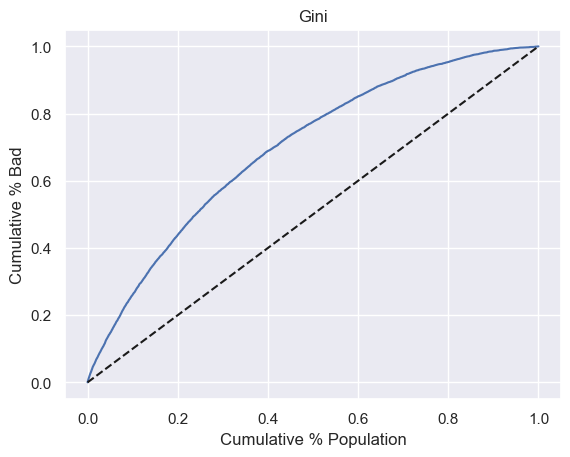

In [79]:
# plot Gini

# We plot the cumulative percentage of all along the x-axis and the cumulative percentage 'good' along the y-axis,thus plotting the Gini curve.
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])

# We plot a seconary diagonal line, with dashed line style.
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')

plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

In [80]:
Gini = AUROC * 2 - 1
# Here we calculate Gini from AUROC.
Gini

0.4346422590702468

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

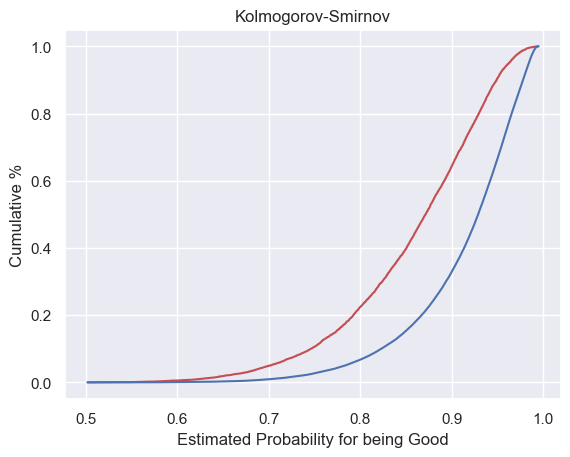

In [81]:
# Plot KS

# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'bad' along the y-axis.
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')

# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'good' along the y-axis.
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
 
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

In [82]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
KS

0.31904745680111385

## Save the model

In [173]:
import pickle
pickle.dump(reg2, open('pd_model.sav', 'wb'))

# Apply the PD model

## Calculating PD of individual account

In [83]:
pd.options.display.max_columns = None

In [84]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57
362514,False,False,True,False,False,False,False,0,False,True,0,0,False,0,True,0,0,0,0,0,False,0,0,0,False,False,True,0,False,False,0,1,True,False,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
288564,False,False,False,False,True,False,False,0,False,True,0,0,False,0,False,0,0,1,0,0,False,0,0,0,False,False,True,0,True,False,0,0,False,True,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
213591,False,False,True,False,False,False,False,0,False,True,0,0,False,0,False,1,0,0,0,0,False,0,0,0,False,False,True,0,False,True,0,0,True,False,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
263083,False,False,True,False,False,False,False,0,False,True,0,0,False,0,False,0,1,0,0,0,False,0,0,0,False,True,False,0,False,True,0,0,False,True,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
165001,True,False,False,False,False,False,False,0,False,True,0,0,False,0,False,0,1,0,0,0,False,0,0,0,False,False,True,0,False,True,0,0,True,False,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [85]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.242444,NaN
1,grade:A,0.907848,1.051444e-18
2,grade:B,0.734869,5.140006e-29
3,grade:C,0.539736,7.677199e-19
4,grade:D,0.342794,3.085834e-09
5,grade:E,0.170730,8.397687e-04
6,grade:F,-0.039177,4.590897e-01
7,home_ownership:OWN,0.070423,1.227071e-03
8,home_ownership:MORTGAGE,0.081599,2.081936e-09
9,addr_state:NM_VA,0.049573,1.496341e-01


In [86]:
y_hat_test_proba

array([0.93347413, 0.92611743, 0.89699512, ..., 0.98077745, 0.96071823,
       0.9558672 ])

## Getting a scorecard

In [87]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.242444,NaN
1,grade:A,0.907848,1.051444e-18
2,grade:B,0.734869,5.140006e-29
3,grade:C,0.539736,7.677199e-19
4,grade:D,0.342794,3.085834e-09
5,grade:E,0.170730,8.397687e-04
6,grade:F,-0.039177,4.590897e-01
7,home_ownership:OWN,0.070423,1.227071e-03
8,home_ownership:MORTGAGE,0.081599,2.081936e-09
9,addr_state:NM_VA,0.049573,1.496341e-01


In [88]:
ref_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:educ__sm_b__wedd__ren_en__mov__house',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'mths_since_issue_d:>84',
 'int_rate:>20.281',
 'mths_since_earliest_cr_line:<140',
 'inq_last_6mths:>6',
 'annual_inc:<20K',
 'mths_since_last_delinq:0-3']

In [89]:
df_ref_categories = pd.DataFrame(ref_categories,columns = ['Feature name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan
df_ref_categories

,Feature name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:educ__sm_b__wedd__ren_en__mov__house,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,mths_since_issue_d:>84,0,NaN
9,int_rate:>20.281,0,NaN


In [90]:
df_scorecard = pd.concat([summary_table,df_ref_categories])
df_scorecard = df_scorecard.reset_index()
df_scorecard

,index,Feature name,Coefficients,p_values
0,0,Intercept,-0.242444,NaN
1,1,grade:A,0.907848,1.051444e-18
2,2,grade:B,0.734869,5.140006e-29
3,3,grade:C,0.539736,7.677199e-19
4,4,grade:D,0.342794,3.085834e-09
5,5,grade:E,0.170730,8.397687e-04
6,6,grade:F,-0.039177,4.590897e-01
7,7,home_ownership:OWN,0.070423,1.227071e-03
8,8,home_ownership:MORTGAGE,0.081599,2.081936e-09
9,9,addr_state:NM_VA,0.049573,1.496341e-01


In [91]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]

In [92]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,-0.242444,NaN,Intercept
1,1,grade:A,0.907848,1.051444e-18,grade
2,2,grade:B,0.734869,5.140006e-29,grade
3,3,grade:C,0.539736,7.677199e-19,grade
4,4,grade:D,0.342794,3.085834e-09,grade
5,5,grade:E,0.170730,8.397687e-04,grade
6,6,grade:F,-0.039177,4.590897e-01,grade
7,7,home_ownership:OWN,0.070423,1.227071e-03,home_ownership
8,8,home_ownership:MORTGAGE,0.081599,2.081936e-09,home_ownership
9,9,addr_state:NM_VA,0.049573,1.496341e-01,addr_state


In [93]:
min_score = 300
max_score = 850

In [94]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()

Original feature name
Intercept                     -0.242444
addr_state                     0.000000
annual_inc                    -0.196583
emp_length                     0.000000
grade                         -0.039177
home_ownership                 0.000000
initial_list_status            0.000000
inq_last_6mths                -0.053705
int_rate                       0.000000
mths_since_earliest_cr_line    0.000000
mths_since_issue_d            -0.006484
mths_since_last_delinq         0.000000
purpose                        0.000000
term                           0.000000
verification_status            0.000000
Name: Coefficients, dtype: float64

In [95]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
min_sum_coef

-0.5383945754569548

In [96]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
max_sum_coef

5.535298291601345

In [97]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-0.242444,NaN,Intercept,-21.954427
1,1,grade:A,0.907848,1.051444e-18,grade,82.209673
2,2,grade:B,0.734869,5.140006e-29,grade,66.545628
3,3,grade:C,0.539736,7.677199e-19,grade,48.875501
4,4,grade:D,0.342794,3.085834e-09,grade,31.041558
5,5,grade:E,0.170730,8.397687e-04,grade,15.460361
6,6,grade:F,-0.039177,4.590897e-01,grade,-3.547660
7,7,home_ownership:OWN,0.070423,1.227071e-03,home_ownership,6.377134
8,8,home_ownership:MORTGAGE,0.081599,2.081936e-09,home_ownership,7.389113
9,9,addr_state:NM_VA,0.049573,1.496341e-01,addr_state,4.489056


In [98]:
# adjust the intercept
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score 
df_scorecard

C:\Users\scarl\AppData\Local\Temp\ipykernel_10456\2564963009.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-0.242444,NaN,Intercept,326.799605
1,1,grade:A,0.907848,1.051444e-18,grade,82.209673
2,2,grade:B,0.734869,5.140006e-29,grade,66.545628
3,3,grade:C,0.539736,7.677199e-19,grade,48.875501
4,4,grade:D,0.342794,3.085834e-09,grade,31.041558
5,5,grade:E,0.170730,8.397687e-04,grade,15.460361
6,6,grade:F,-0.039177,4.590897e-01,grade,-3.547660
7,7,home_ownership:OWN,0.070423,1.227071e-03,home_ownership,6.377134
8,8,home_ownership:MORTGAGE,0.081599,2.081936e-09,home_ownership,7.389113
9,9,addr_state:NM_VA,0.049573,1.496341e-01,addr_state,4.489056


In [99]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,-0.242444,NaN,Intercept,326.799605,327.0
1,1,grade:A,0.907848,1.051444e-18,grade,82.209673,82.0
2,2,grade:B,0.734869,5.140006e-29,grade,66.545628,67.0
3,3,grade:C,0.539736,7.677199e-19,grade,48.875501,49.0
4,4,grade:D,0.342794,3.085834e-09,grade,31.041558,31.0
5,5,grade:E,0.170730,8.397687e-04,grade,15.460361,15.0
6,6,grade:F,-0.039177,4.590897e-01,grade,-3.547660,-4.0
7,7,home_ownership:OWN,0.070423,1.227071e-03,home_ownership,6.377134,6.0
8,8,home_ownership:MORTGAGE,0.081599,2.081936e-09,home_ownership,7.389113,7.0
9,9,addr_state:NM_VA,0.049573,1.496341e-01,addr_state,4.489056,4.0


In [100]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
min_sum_score_prel

299.0

In [101]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
max_sum_score_prel

851.0

In [102]:
# 851 > 850 is due to the round method. 
# One has to be subtracted from the maximum score for one original variable by evaluating based on differences.
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference
0,0,Intercept,-0.242444,NaN,Intercept,326.799605,327.0,0.200395
1,1,grade:A,0.907848,1.051444e-18,grade,82.209673,82.0,-0.209673
2,2,grade:B,0.734869,5.140006e-29,grade,66.545628,67.0,0.454372
3,3,grade:C,0.539736,7.677199e-19,grade,48.875501,49.0,0.124499
4,4,grade:D,0.342794,3.085834e-09,grade,31.041558,31.0,-0.041558
5,5,grade:E,0.170730,8.397687e-04,grade,15.460361,15.0,-0.460361
6,6,grade:F,-0.039177,4.590897e-01,grade,-3.547660,-4.0,-0.452340
7,7,home_ownership:OWN,0.070423,1.227071e-03,home_ownership,6.377134,6.0,-0.377134
8,8,home_ownership:MORTGAGE,0.081599,2.081936e-09,home_ownership,7.389113,7.0,-0.389113
9,9,addr_state:NM_VA,0.049573,1.496341e-01,addr_state,4.489056,4.0,-0.489056


In [103]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][67] = 13
df_scorecard

C:\Users\scarl\AppData\Local\Temp\ipykernel_10456\3327117795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Final'][67] = 13


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-0.242444,NaN,Intercept,326.799605,327.0,0.200395,327.0
1,1,grade:A,0.907848,1.051444e-18,grade,82.209673,82.0,-0.209673,82.0
2,2,grade:B,0.734869,5.140006e-29,grade,66.545628,67.0,0.454372,67.0
3,3,grade:C,0.539736,7.677199e-19,grade,48.875501,49.0,0.124499,49.0
4,4,grade:D,0.342794,3.085834e-09,grade,31.041558,31.0,-0.041558,31.0
5,5,grade:E,0.170730,8.397687e-04,grade,15.460361,15.0,-0.460361,15.0
6,6,grade:F,-0.039177,4.590897e-01,grade,-3.547660,-4.0,-0.452340,-4.0
7,7,home_ownership:OWN,0.070423,1.227071e-03,home_ownership,6.377134,6.0,-0.377134,6.0
8,8,home_ownership:MORTGAGE,0.081599,2.081936e-09,home_ownership,7.389113,7.0,-0.389113,7.0
9,9,addr_state:NM_VA,0.049573,1.496341e-01,addr_state,4.489056,4.0,-0.489056,4.0


In [104]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
min_sum_score_prel

299.0

In [105]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()
max_sum_score_prel

850.0

## Calculate Credit Score

In [106]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57
362514,False,False,True,False,False,False,False,0,False,True,0,0,False,0,True,0,0,0,0,0,False,0,0,0,False,False,True,0,False,False,0,1,True,False,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
288564,False,False,False,False,True,False,False,0,False,True,0,0,False,0,False,0,0,1,0,0,False,0,0,0,False,False,True,0,True,False,0,0,False,True,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
213591,False,False,True,False,False,False,False,0,False,True,0,0,False,0,False,1,0,0,0,0,False,0,0,0,False,False,True,0,False,True,0,0,True,False,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
263083,False,False,True,False,False,False,False,0,False,True,0,0,False,0,False,0,1,0,0,0,False,0,0,0,False,True,False,0,False,True,0,0,False,True,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
165001,True,False,False,False,False,False,False,0,False,True,0,0,False,0,False,0,1,0,0,0,False,0,0,0,False,False,True,0,False,True,0,0,True,False,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [107]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-0.242444,NaN,Intercept,326.799605,327.0,0.200395,327.0
1,1,grade:A,0.907848,1.051444e-18,grade,82.209673,82.0,-0.209673,82.0
2,2,grade:B,0.734869,5.140006e-29,grade,66.545628,67.0,0.454372,67.0
3,3,grade:C,0.539736,7.677199e-19,grade,48.875501,49.0,0.124499,49.0
4,4,grade:D,0.342794,3.085834e-09,grade,31.041558,31.0,-0.041558,31.0
5,5,grade:E,0.170730,8.397687e-04,grade,15.460361,15.0,-0.460361,15.0
6,6,grade:F,-0.039177,4.590897e-01,grade,-3.547660,-4.0,-0.452340,-4.0
7,7,home_ownership:OWN,0.070423,1.227071e-03,home_ownership,6.377134,6.0,-0.377134,6.0
8,8,home_ownership:MORTGAGE,0.081599,2.081936e-09,home_ownership,7.389113,7.0,-0.389113,7.0
9,9,addr_state:NM_VA,0.049573,1.496341e-01,addr_state,4.489056,4.0,-0.489056,4.0


In [108]:
inputs_test_with_cat_w_intercept = inputs_test_with_ref_cat

In [109]:
# the original inputs_test_with_ref_cat does not have intercept, so we add it
inputs_test_with_cat_w_intercept.insert(0,'Intercept',1)

In [110]:
inputs_test_with_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57
362514,1,False,False,True,False,False,False,False,0,False,True,0,0,False,0,True,0,0,0,0,0,False,0,0,0,False,False,True,0,False,False,0,1,True,False,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
288564,1,False,False,False,False,True,False,False,0,False,True,0,0,False,0,False,0,0,1,0,0,False,0,0,0,False,False,True,0,True,False,0,0,False,True,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
213591,1,False,False,True,False,False,False,False,0,False,True,0,0,False,0,False,1,0,0,0,0,False,0,0,0,False,False,True,0,False,True,0,0,True,False,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
263083,1,False,False,True,False,False,False,False,0,False,True,0,0,False,0,False,0,1,0,0,0,False,0,0,0,False,True,False,0,False,True,0,0,False,True,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
165001,1,True,False,False,False,False,False,False,0,False,True,0,0,False,0,False,0,1,0,0,0,False,0,0,0,False,False,True,0,False,True,0,0,True,False,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [111]:
inputs_test_with_cat_w_intercept = inputs_test_with_cat_w_intercept[df_scorecard['Feature name'].values]

In [112]:
scorecard_scores = df_scorecard['Score - Final']

In [113]:
inputs_test_with_cat_w_intercept.shape

(93257, 83)

In [114]:
scorecard_scores.shape

(83,)

In [115]:
inputs_test_with_cat_w_intercept = inputs_test_with_cat_w_intercept.applymap(lambda x: int(x) if isinstance(x, bool) else x)

In [116]:
inputs_test_with_cat_w_intercept.dtypes

Intercept                                       int64
grade:A                                         int64
grade:B                                         int64
grade:C                                         int64
grade:D                                         int64
grade:E                                         int64
grade:F                                         int64
home_ownership:OWN                              int64
home_ownership:MORTGAGE                         int64
addr_state:NM_VA                                int64
addr_state:NY                                   int64
addr_state:OK_TN_MO_LA_MD_NC                    int64
addr_state:CA                                   int64
addr_state:UT_KY_AZ_NJ                          int64
addr_state:AR_MI_PA_OH_MN                       int64
addr_state:RI_MA_DE_SD_IN                       int64
addr_state:GA_WA_OR                             int64
addr_state:WI_MT                                int64
addr_state:TX               

In [117]:
scorecard_scores = scorecard_scores.values.reshape(83,1)

In [118]:
scorecard_scores.shape

(83, 1)

In [119]:
y_scores = inputs_test_with_cat_w_intercept.dot(scorecard_scores)
y_scores.head()

,0
362514,589.0
288564,578.0
213591,545.0
263083,642.0
165001,650.0


## From credit score to Probability of Default(PD)

In [120]:
# reverse the calculation operation from PD to scorecard, then we have the sum of coefficient from scores
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef

In [124]:
# coefficient is the log of (1-PD)/PD, thus we take the exponent of it to calculate PD
# +1 is derived from ln((1-PD)/PD) = e^sum_coef_from_score
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
y_hat_proba_from_score.head()

,0
362514,0.934199
288564,0.926326
213591,0.897261
263083,0.962252
165001,0.965333


In [125]:
# The difference is because of the rounding process when creating scorecard
y_hat_test_proba[0: 5]

array([0.93347413, 0.92611743, 0.89699512, 0.96184244, 0.96532587])

## Setting Cut-offs

Once a cut-off is set. It predetermines the total number of borrowers that will be approved and rejected, and it impacts the quality of the loans. There will naturally be a trade-off.

In [126]:
# We need the confusion matrix again.
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [127]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,5546,3071
1,27852,56788


In [128]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.059470,0.032931
1,0.298659,0.608941


In [129]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.6684109503844216

In [130]:
from sklearn.metrics import roc_curve, roc_auc_score

In [131]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99941975, 0.99941975,
        1.        ]),
 array([0.00000000e+00, 1.18147448e-05, 1.18147448e-04, ...,
        9.99988185e-01, 1.00000000e+00, 1.00000000e+00]),
 array([       inf, 0.9947677 , 0.99415543, ..., 0.53264275, 0.53227302,
        0.50186801]))

In [132]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

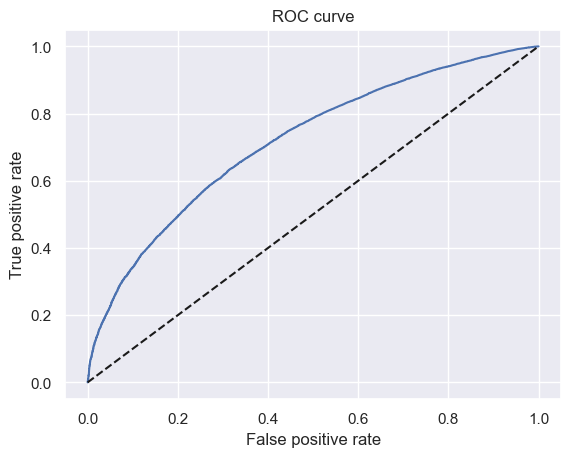

In [134]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [136]:
thresholds

array([       inf, 0.9947677 , 0.99415543, ..., 0.53264275, 0.53227302,
       0.50186801])

In [137]:
thresholds.shape

(15625,)

In [140]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds),pd.DataFrame(fpr),pd.DataFrame(tpr)],axis=1)

In [141]:
df_cutoffs.columns = ['thresholds','fpr','tpr']

In [142]:
df_cutoffs.head()

,thresholds,fpr,tpr
0,inf,0.0,0.000000
1,0.994768,0.0,0.000012
2,0.994155,0.0,0.000118
3,0.994125,0.0,0.000142
4,0.993296,0.0,0.000532


In [143]:
df_cutoffs['thresholds'][0] = 1 - 1/np.power(10,16)

In [144]:
# calculate the corresponding score for each thresholds
df_cutoffs['Score']= ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()

In [145]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.0,0.000000,2282.0
1,0.994768,0.0,0.000012,824.0
2,0.994155,0.0,0.000118,814.0
3,0.994125,0.0,0.000142,813.0
4,0.993296,0.0,0.000532,801.0


In [147]:
df_cutoffs['Score'][0] = max_score

In [148]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.0,0.000000,850.0
1,0.994768,0.0,0.000012,824.0
2,0.994155,0.0,0.000118,814.0
3,0.994125,0.0,0.000142,813.0
4,0.993296,0.0,0.000532,801.0


In [149]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score
15620,0.547346,0.999304,0.999917,366.0
15621,0.532704,0.999304,0.999988,361.0
15622,0.532643,0.999420,0.999988,361.0
15623,0.532273,0.999420,1.000000,360.0
15624,0.501868,1.000000,1.000000,349.0


In [150]:
# p is the probability threshold
# We want the number of people who has default probability greater than threshold
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1,0).sum()

In [151]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']

In [153]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.0,0.000000,850.0,0,93257,0.000000,1.000000
1,0.994768,0.0,0.000012,824.0,1,93256,0.000011,0.999989
2,0.994155,0.0,0.000118,814.0,10,93247,0.000107,0.999893
3,0.994125,0.0,0.000142,813.0,12,93245,0.000129,0.999871
4,0.993296,0.0,0.000532,801.0,45,93212,0.000483,0.999517


In [154]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
15620,0.547346,0.999304,0.999917,366.0,93244,13,0.999861,0.000139
15621,0.532704,0.999304,0.999988,361.0,93250,7,0.999925,0.000075
15622,0.532643,0.999420,0.999988,361.0,93251,6,0.999936,0.000064
15623,0.532273,0.999420,1.000000,360.0,93252,5,0.999946,0.000054
15624,0.501868,1.000000,1.000000,349.0,93257,0,1.000000,0.000000


In [159]:
# Assume the the highest level of probability we accept to be bad borrower is 10%, meaning that the probability of borrowers being good is 90%.
# We try to find the corresponding approval and rejection rate.
df_cutoffs.iloc[6200: 6500, ]
# Here when threshold is 0.89975(most close to 0.9), approval rate is 0.642011.

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
6200,0.901384,0.348613,0.664331,549.0,59233,34024,0.635159,0.364841
6201,0.901366,0.348613,0.664402,549.0,59239,34018,0.635223,0.364777
6202,0.901363,0.348729,0.664402,549.0,59240,34017,0.635234,0.364766
6203,0.901330,0.348729,0.664579,549.0,59255,34002,0.635395,0.364605
6204,0.901329,0.348845,0.664579,549.0,59256,34001,0.635405,0.364595
6205,0.901307,0.348845,0.664721,549.0,59268,33989,0.635534,0.364466
6206,0.901303,0.348961,0.664721,549.0,59269,33988,0.635545,0.364455
6207,0.901275,0.348961,0.664969,549.0,59290,33967,0.635770,0.364230
6208,0.901273,0.349077,0.664969,549.0,59291,33966,0.635781,0.364219
6209,0.901209,0.349077,0.665217,549.0,59312,33945,0.636006,0.363994


In [169]:
# if we assume the threshold score is 5, or the minimum probability of not default to be ~ 0.93, the approval rate is about 0.45
df_cutoffs.iloc[3500: 3700, ]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
3500,0.931799,0.187420,0.477528,586.0,42033,51224,0.450722,0.549278
3501,0.931797,0.187536,0.477528,586.0,42034,51223,0.450733,0.549267
3502,0.931789,0.187536,0.477599,586.0,42040,51217,0.450797,0.549203
3503,0.931788,0.187652,0.477599,586.0,42041,51216,0.450808,0.549192
3504,0.931770,0.187652,0.477729,585.0,42052,51205,0.450926,0.549074
3505,0.931770,0.187652,0.477753,585.0,42054,51203,0.450947,0.549053
3506,0.931769,0.187768,0.477753,585.0,42055,51202,0.450958,0.549042
3507,0.931768,0.187768,0.477765,585.0,42056,51201,0.450969,0.549031
3508,0.931766,0.187884,0.477765,585.0,42057,51200,0.450980,0.549020
3509,0.931736,0.187884,0.477977,585.0,42075,51182,0.451173,0.548827


In [171]:
inputs_train_with_ref_cat.to_csv('C:\\Users\\scarl\\Desktop\\projects\\Credit Risk Modeling (Python)\\inputs_train_with_ref_cat.csv')
df_scorecard.to_csv('C:\\Users\\scarl\\Desktop\\projects\\Credit Risk Modeling (Python)\\df_scorecard.csv')